In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
data = pd.read_csv('./mobile_prices.csv')

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.shape

(2000, 21)

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [9]:
corr = data.corr()

corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [11]:
corr = (corr + 1) / 2

In [12]:
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.505626,0.505741,0.479077,0.516667,0.507832,0.497998,0.517042,0.500922,0.485136,...,0.507450,0.495799,0.499674,0.485021,0.489290,0.526255,0.505761,0.494742,0.495829,0.600361
blue,0.505626,1.000000,0.510709,0.517599,0.501797,0.506722,0.520589,0.502025,0.495698,0.518080,...,0.496564,0.479233,0.513175,0.498524,0.500307,0.506967,0.484882,0.505030,0.489068,0.510286
clock_speed,0.505741,0.510709,1.000000,0.499342,0.499783,0.478463,0.503273,0.492818,0.506175,0.497138,...,0.492739,0.495262,0.501722,0.485461,0.496311,0.494284,0.476783,0.509878,0.487764,0.496697
dual_sim,0.479077,0.517599,0.499342,1.000000,0.485439,0.501593,0.492161,0.488929,0.495510,0.487671,...,0.489562,0.507145,0.520536,0.494025,0.491667,0.480298,0.492996,0.491441,0.511370,0.508722
fc,0.516667,0.501797,0.499783,0.485439,1.000000,0.491720,0.485434,0.499104,0.511809,0.493322,...,0.495005,0.497412,0.507549,0.494493,0.493814,0.496586,0.500896,0.492586,0.510042,0.510999
four_g,0.507832,0.506722,0.478463,0.501593,0.491720,1.000000,0.504345,0.499088,0.491732,0.485147,...,0.490382,0.503724,0.503657,0.513583,0.518502,0.476686,0.792123,0.508379,0.491190,0.507386
int_memory,0.497998,0.520589,0.503273,0.492161,0.485434,0.504345,1.000000,0.503443,0.482893,0.485845,...,0.505221,0.495833,0.516407,0.518886,0.505865,0.498605,0.495317,0.486501,0.503497,0.522217
m_dep,0.517042,0.502025,0.492818,0.488929,0.499104,0.499088,0.503443,1.000000,0.510878,0.498248,...,0.512631,0.511783,0.495283,0.487326,0.490806,0.508501,0.493967,0.498681,0.485824,0.500427
mobile_wt,0.500922,0.495698,0.506175,0.495510,0.511809,0.491732,0.482893,0.510878,1.000000,0.490506,...,0.500470,0.500045,0.498710,0.483073,0.489620,0.503104,0.500775,0.492816,0.499795,0.484849
n_cores,0.485136,0.518080,0.497138,0.487671,0.493322,0.485147,0.485845,0.498248,0.490506,1.000000,...,0.496564,0.512240,0.502434,0.499843,0.512913,0.506574,0.492634,0.511887,0.495018,0.502200


Text(0.5, 1.0, 'Correlations')

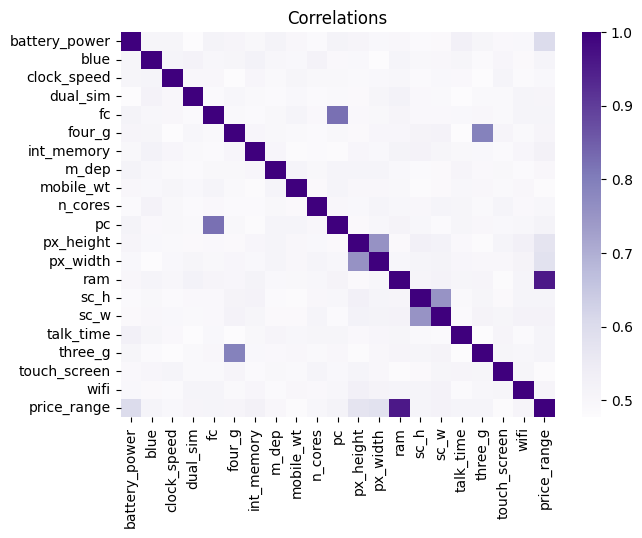

In [13]:
fig = plt.figure(figsize=(7, 5))
r = sns.heatmap(corr, cmap='Purples')
r.set_title('Correlations')

In [18]:
corr.sort_values(
    by=['price_range'],
    ascending=False
).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.958523
battery_power    0.600361
px_width         0.582909
px_height        0.574429
int_memory       0.522217
sc_w             0.519356
pc               0.516800
three_g          0.511806
sc_h             0.511493
fc               0.510999
talk_time        0.510929
blue             0.510286
wifi             0.509392
dual_sim         0.508722
four_g           0.507386
n_cores          0.502200
m_dep            0.500427
clock_speed      0.496697
mobile_wt        0.484849
touch_screen     0.484794
Name: price_range, dtype: float64

In [19]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [25]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [26]:
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

In [29]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')

classifier.fit(X_train, y_train)


SVC()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test) * 100

In [32]:
accuracy

89.0

In [33]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3
row_0,,,,
0,97,6,0,0
1,5,77,10,0
2,0,8,90,3
3,0,0,12,92


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_pred, y_test)

array([[97,  5,  0,  0],
       [ 6, 77,  8,  0],
       [ 0, 10, 90, 12],
       [ 0,  0,  3, 92]], dtype=int64)

In [36]:
print(
    classification_report(y_pred, y_test)
)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.84      0.85      0.84        91
           2       0.89      0.80      0.85       112
           3       0.88      0.97      0.92        95

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

